<a href="https://colab.research.google.com/github/ewattudo/gis/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 0 Overview
The data I plan to use for class is related to my job rather than my scholarly interests. I'm most interested in seeing where applicants and students to Rutgers-Camden live. For this problem set, I will not be adding the data from the first problem set, but I do want to experiment with different maps—both global and US.

# Install Files

In [ ]:
!pip install geopandas==1.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4


In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.0 MB/s eta 0:00:00


# Maps

## World Maps
Since the Graduate School's catchment area is global, I want to experiment with maps displaying political boundaries worldwide. Below are two maps with different upload styles. The first is less detailed than the second, which involves downloading from a zip file rather than directly to a shapefile.

In [ ]:
world=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp') #load the shapefile with gpd as njC

<Axes: >

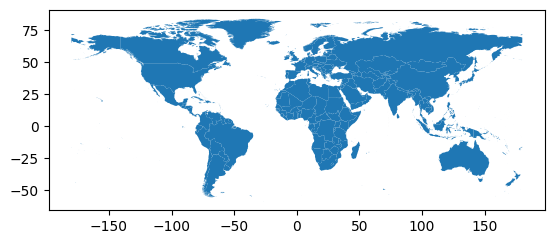

In [ ]:
world.plot()

In [ ]:
#I want to see if I can find one with country names
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

<Axes: >

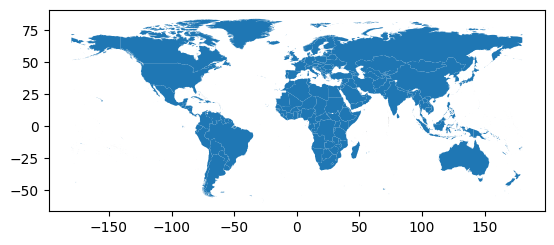

In [ ]:
#No country names that I can see, but this file seems to be m0re detailed I can see some bodies of water. I also wanted to see if I can upload from a Zip rather than directly to the shapefile.
Countries.plot()

In [ ]:
#I want to see if I can find one with country names
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

## US Maps
Here I wanted to look at US maps.

### US Map with States

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

In [ ]:
US.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."


<Axes: >

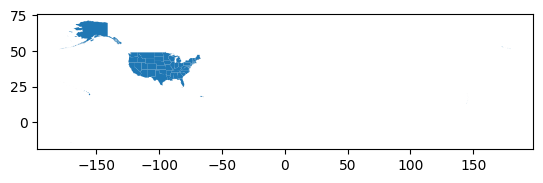

In [ ]:
US.plot()

### US Map with Universities
Here I just wanted to find some data that wasn't just boundaries like all the other plots. This plots all the universities in the US. I manipulated the plot size a bit but I don't think the data is useful other than to show that there are a large number of universities in the US.

In [ ]:
Uni=gpd.read_file('https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities@public/exports/shp')

<Axes: >

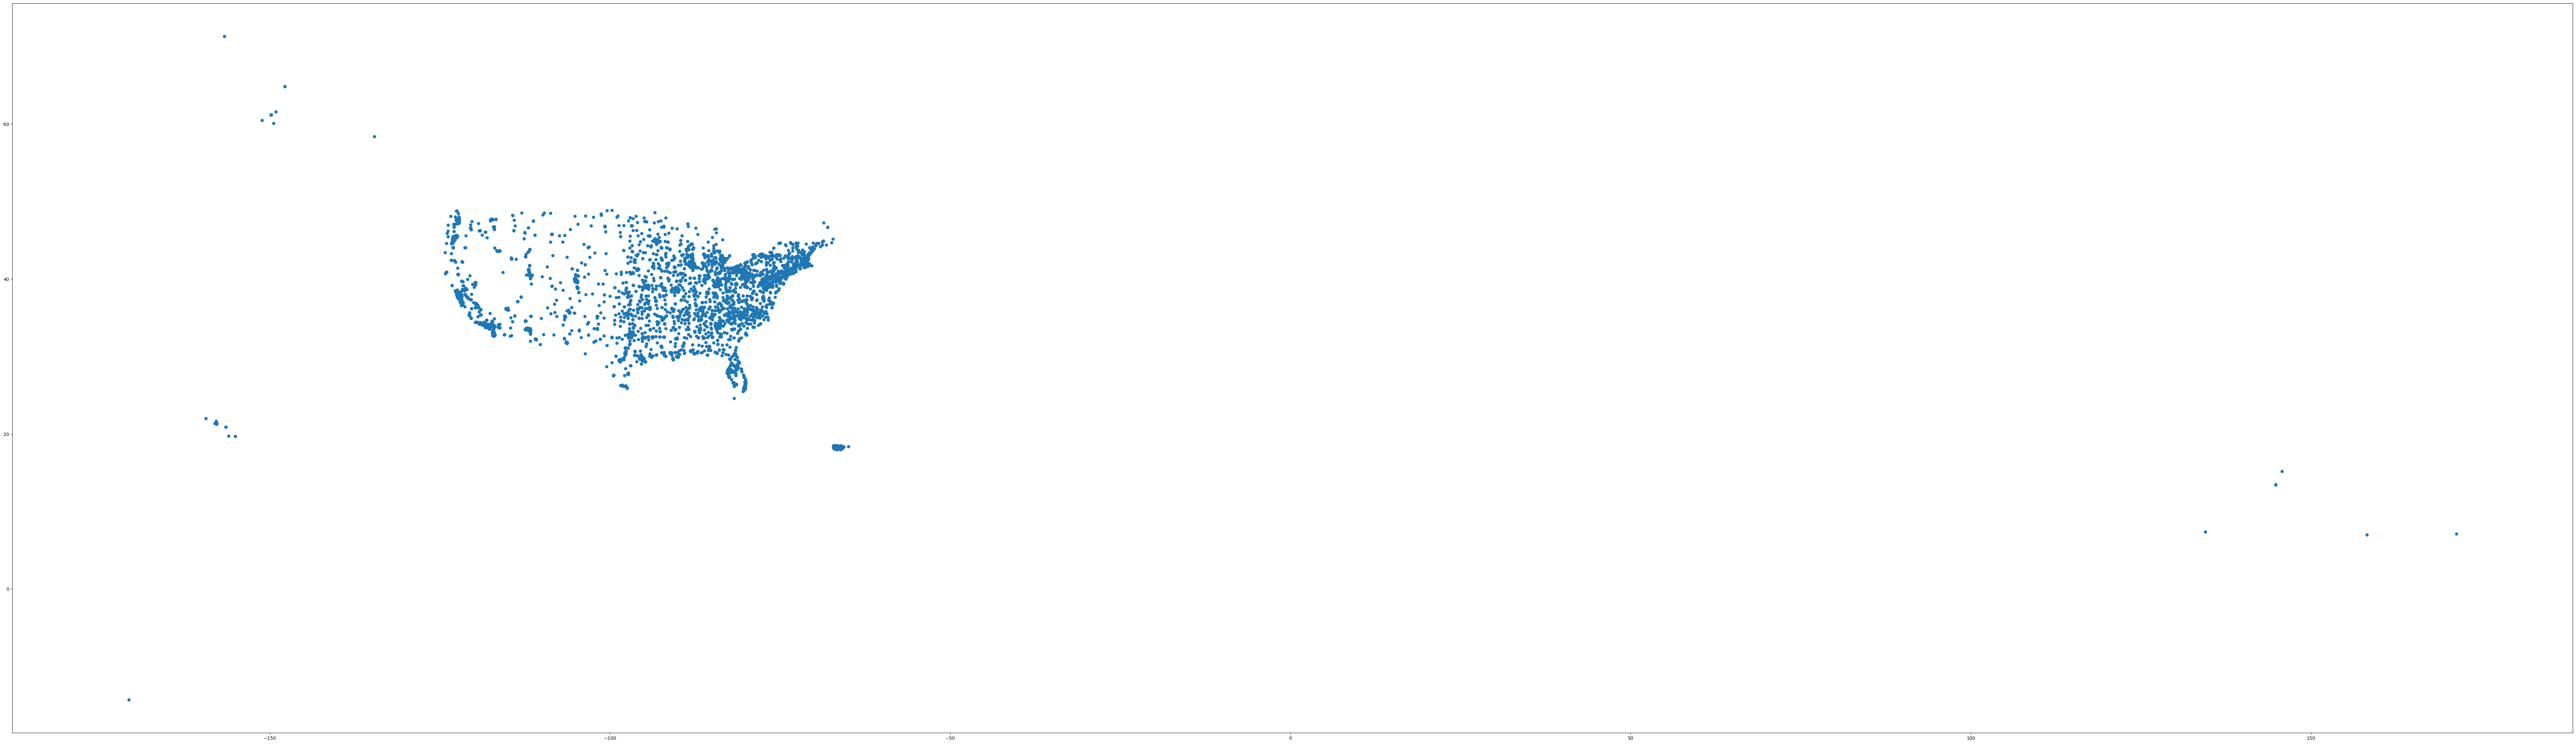

In [ ]:
fig, ax = plt.subplots(figsize=(10, 50))
Uni.plot(ax=ax)

### PA Universities
The previous map is unusable, so I want to look at a smaller geography. Since the map file has NJ, I will look at universities in PA.

Despite a lack of political boundaries, it is clear there are a large number of universities in the Philadelphia area. Not surprising but interesting to see visually.

In [ ]:
PA_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&timezone=America%2FNew_York')

<Axes: >

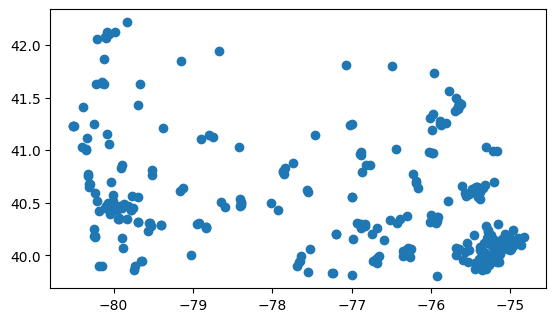

In [ ]:
PA_Uni.plot()

In [ ]:
Philly_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&refine=city%3A%22PHILADELPHIA%22&timezone=America%2FNew_York')

#### Philadelpha Universities
I decided to plot just the universities in Philadelphia county. I am not sure how useful this is by itself.

However, this exercise is interesting because I often compare Philadelpha university competition against Idaho anecdotally and it's not an unfair comparison. There are 36 schools in Phiadelpha county but only 41 universities in the entire state of Idaho. In the future, I am interested in visualizing this comparison in a useful way.

<Axes: >

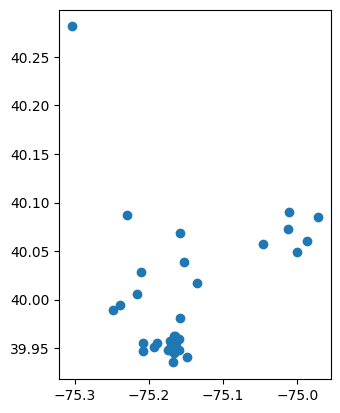

In [ ]:
Philly_Uni.plot()